In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Data preprocessing
firstly we will explore the data and taje in considerations columns we nedd and drop others we don't

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


### it appears that the unamed is indexing so we will drop it 

In [3]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


In [5]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


### from describe there are some unusual beahviours observed as :
- the min in the diff coulmn is -ve value
- symptom 6 has its percentiles and max equal to each other
- gender have a max of 2

### fristly we explore the diff as it's descrioed in the project statement that it's the time the symptoms appeared so it can't be less than 0

In [6]:
print(df[df['diff_sym_hos'] <0])

     location  country  gender   age  vis_wuhan  from_wuhan  symptom1  \
223        56       18       1  35.0          0           0         6   
240       128       18       1  65.0          0           0         6   

     symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  result  
223        31        19        12         3         1            -1       0  
240        31        19        12         3         1            -5       0  


### next we explore the values of sympotom 6 and the gender

In [7]:
print(df['symptom6'].value_counts())

symptom6
1    862
0      1
Name: count, dtype: int64


#### as can be seen there's only 1 zero so the symptom doesn't effect any model so we will drop it

In [8]:
gender = df['gender'].value_counts()
print(gender)

gender
1    389
0    302
2    172
Name: count, dtype: int64


#### an undefined variable 2  exists with big frequency so that makes it redundant to make sure we will pie plot the percentages

([<matplotlib.patches.Wedge at 0x200c3b03d60>,
 [Text(-0.16950666640350712, -1.0868613021194427, '1'),
  Text(0.7742700740940995, 0.7813487392722392, '0'),
  Text(-0.8913287401236816, 0.6446185515710283, '2')],
 [Text(-0.09245818167464025, -0.592833437519696, '45.08%'),
  Text(0.42232913132405425, 0.42619022142122137, '34.99%'),
  Text(-0.48617931279473536, 0.3516101190387427, '19.93%')])

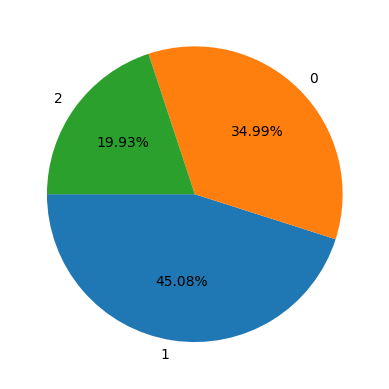

In [9]:
labels=[1,0,2] # as one appeared before 0 in the data
plt.pie(gender,labels=labels,startangle=180,autopct="%2.2f%%")

## we can drop symptom 6 as it doesn't affect the data and gender can be kept or dropped

In [10]:
X = df.drop(columns=['result' ,'symptom6'],axis = 1).values #['gender' ,'result','symptom6']
y = df['result'].values

# now we will visualize the data to know how it looks like between the age and time of symptoms showing as they are the most relastic paramters to take decision upon 

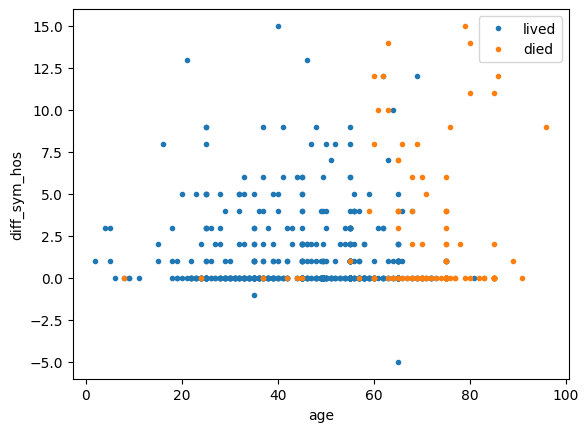

In [11]:
plt.plot(X[y==0,3],X[y==0,-1],'.')
plt.plot(X[y==1,3],X[y==1,-1],'.')
plt.xlabel('age')
plt.ylabel('diff_sym_hos')
plt.legend(['lived','died'])

### it can be seen that above age 60 there's  a high chance of death

## splitting into train and test
- random_state is chosen 42 for recreation

In [12]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=50)

### feautre scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# importing metrics and validations to be used as required

In [14]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score ,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , auc
from sklearn.metrics import roc_curve , RocCurveDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
score_idx = ["acc","recall","percision","f1 score","AUC"]
comp={}

## important functions

In [15]:
def scoresmet(y_pred,y_true=y_test):
    res = []
    res +=[accuracy_score(y_true=y_test,y_pred=y_pred)]
    res += [recall_score(y_true=y_test,y_pred=y_pred)]
    res += [precision_score(y_true=y_test,y_pred=y_pred)]
    res += [f1_score(y_true=y_test,y_pred=y_pred)]
    print(f"accuracy score :{res[0]:0.3f} ")
    print(f"recall score :{res[1]:0.3f}     percesion score : {res[2]:0.3f}")
    print(f"f1 score :{res[-1]:0.3f} ")
    return res

In [16]:
def confmat(y_pred,y_true=y_test):
    cm=confusion_matrix(y_pred=y_pred,y_true=y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot()
    plt.show()

In [17]:
def rocgraph(model):
    display = RocCurveDisplay.from_estimator(model,X_test,y_test)
    a = display.roc_auc
    return a ,display

In [18]:
#TODO discover the problem ---- > inconsisitent
def kf_validation(model,scoring,n_splits=10):
    kf = KFold(n_splits=n_splits,random_state=42)
    best_model = None
    best_rec = 0.0
    methods = {"acc":accuracy_score,
               "rec":recall_score,
               "pre":precision_score}
    score = methods[scoring]
    records=[]
    for tr_idx ,test_idx in kf.split(X_train) :

        ## splitting to train and validation
        xtr,xte=X_train[tr_idx],X_train[test_idx]
        ytr,yte=y_train[tr_idx],y_train[test_idx]

        #training
        classifier_k = model
        print(score)
        classifier_k.fit(xtr,ytr)

        #testing
        y_hat = classifier_k.predict(xte)

        #recording and choosing best model
        records+=[score(y_pred=y_hat,y_true=yte)]
        if records[-1] > best_rec :
            best_rec = records[-1]
            best_model = classifier_k
        
    print(f"best {scoring} :{best_rec} ")
    print(f"avg {scoring} : {np.mean(records)}")
    return best_model
    
    

### after searching we found we can do dimensionality reduction to draw a decision boundary

In [19]:
from sklearn.decomposition import PCA

In [20]:
def decision_boundary(model) :
    pca = PCA(n_components=2)
    X_test_pca = pca.fit_transform(X_test)
    h = .02  # step size in the mesh
    x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
    y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain predictions for each point in the meshgrid
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

    # Reshape the predictions for contour plotting
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

    # Scatter plot of training data points
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.RdYlBu)

    plt.title('Decision Boundary Visualization using PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Naive Bayes

#### as naive bayes already have low accuracy as it deal like thre's nothimg dependant on the other we will use accuracy in scoring the model

In [21]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()

best accuracy :  0.37681159420289856
avg accuracy :  0.2855072463768116


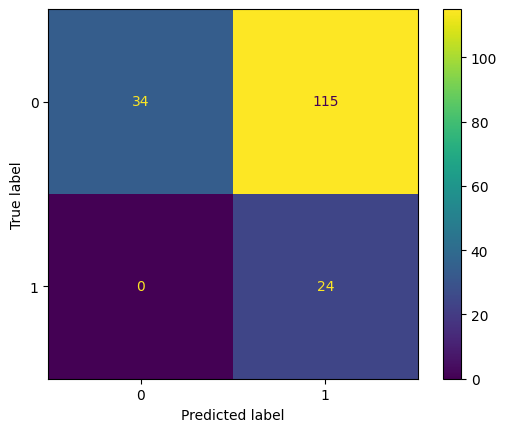

In [22]:
kf = KFold(n_splits=10)
best_model_knb = None
best_rec = 0.0
recs=[]
for tr_idx ,test_idx in kf.split(X_train) :
    xtr,xte=X_train[tr_idx],X_train[test_idx]
    ytr,yte=y_train[tr_idx],y_train[test_idx]

    classifier_k = GaussianNB()

    classifier_k.fit(xtr,ytr)

    y_hat = classifier_k.predict(xte)

    acc = accuracy_score(y_pred=y_hat,y_true=yte)
    recs+=[acc]

    if acc > best_rec :
        best_rec = acc
        best_model_knb = classifier_k
        
print("best accuracy : ", best_rec)
print("avg accuracy : ", np.mean(recs))
y_hat = best_model_knb.predict(X_test)
confmat(y_hat)

accuracy score :0.335 
recall score :1.000     percesion score : 0.173
f1 score :0.294 


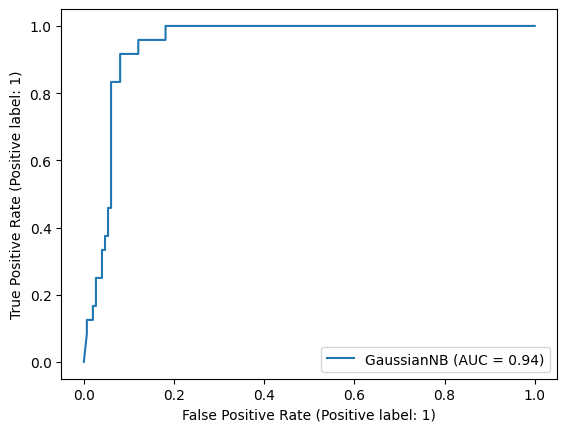

In [23]:
compnb = {}
a ,roc_nb_k= rocgraph(best_model_knb)
KFold_NB_scores = scoresmet(y_hat)
KFold_NB_scores += [a]
compnb['Naive Bayes k'] = KFold_NB_scores

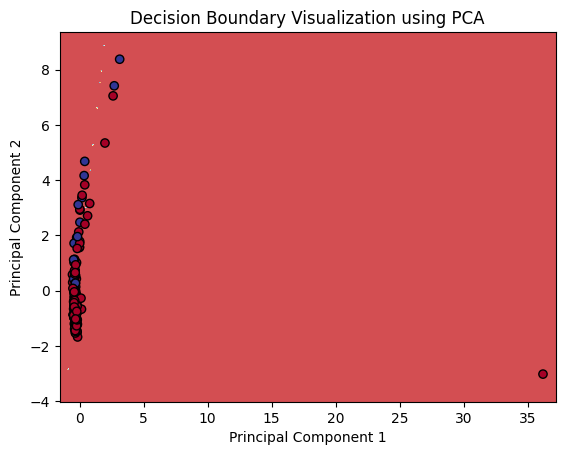

In [24]:
decision_boundary(best_model_knb)

### we will use grid search to find paramters to pass to the GuassianNB() function so we would get a better model

#### we don't know the prior prob so we can't use it but we can smooth the curve 
 - its default is 1e-9
 - we will search for a number on a logscale for it  from 0 == 1 and -9 == 1e-9 which is the default
 

In [25]:
best_model_gridnb=GaussianNB()

#the hyperparameters to search
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search = GridSearchCV(best_model_gridnb, param_grid, cv=10, scoring='accuracy', verbose=1)

# Fitting the model to the training data
grid_search.fit(X_train, y_train)

best_params = list(grid_search.best_params_.values())
print(best_params)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[1.0]


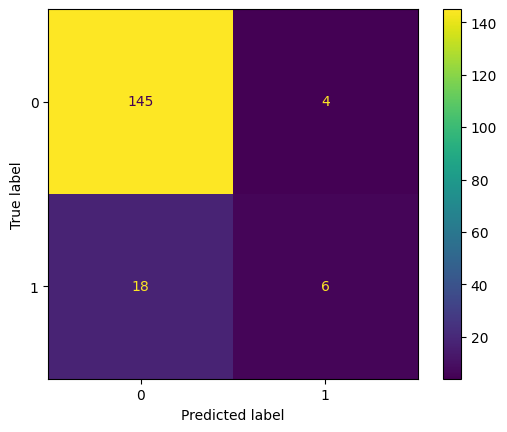

In [26]:
best_model_gridnb = GaussianNB(var_smoothing=best_params[0])
best_model_gridnb.fit(X_train,y_train)
y_hat = best_model_gridnb.predict(X_test)
confmat(y_hat)

accuracy score :0.873 
recall score :0.250     percesion score : 0.600
f1 score :0.353 


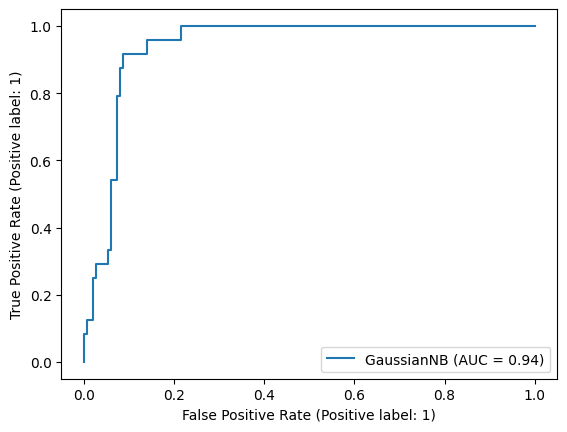

In [27]:
a ,roc_nb_grid= rocgraph(best_model_gridnb)
grid_NB_scores = scoresmet(y_hat)
grid_NB_scores +=[a]

compnb['Naive Bayes grid'] = grid_NB_scores

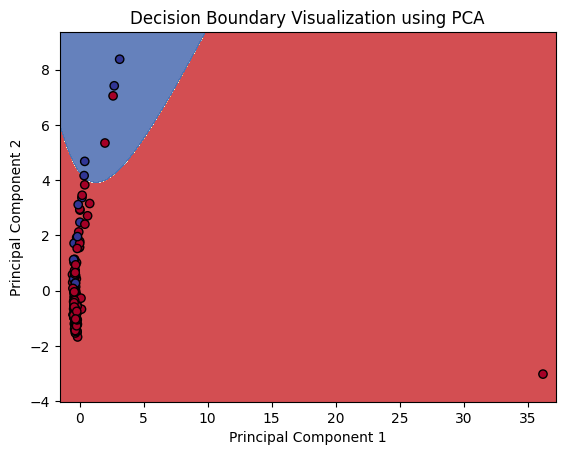

In [28]:
decision_boundary(best_model_gridnb)

#### mini summary for choosing the better model

In [29]:
res_df = pd.DataFrame.from_dict(compnb)
res_df.index = score_idx

In [30]:
res_df.head(5)

,Naive Bayes k,Naive Bayes grid
acc,0.335260,0.872832
recall,1.000000,0.250000
percision,0.172662,0.600000
f1 score,0.294479,0.352941
AUC,0.944631,0.937640


### it can be seen that k folds have higher auc but lower accuracy but we favor auc to accuracy so we will be taking k folds model

In [31]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       149
           1       0.60      0.25      0.35        24

    accuracy                           0.87       173
   macro avg       0.74      0.61      0.64       173
weighted avg       0.85      0.87      0.85       173

